### Instructions before starting - only if you are using Google's colab

If you want to use your own data files with colab, you need to specifically upload them. In previous TP you saw one way of doing it via command line, but the following works too. The next code block when executing will create a "browse" button, from which every time you run it you can use it to load data files. 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

All your data files loaded this way will be in folder "/content", where also you are at the moment. So if in exercises you need to specify data path, just leave that variable as empty string, "". To check that this really is so, with following you can list all the files in the current directory you are in: 

In [ ]:
!ls

depense_etat.txt  sample_data  tennis.txt


# TP3 - PCA

This TP introduces [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) (L'analyse en composantes principales, ACP en français), a well-known and widely used dimensionality reduction method. The idea in PCA is to find the directions of maximal variance in data, and consider only those while discarding all the rest of the variations. 

This notebook begins with very simple preliminary analysis on very simple data, then giving you a chance to implement PCA yourself and finally gives exercises where you shall analyze more interesting real-worl data with it. 

All the questions I'm expecting to find some sort of answer (either by code implementation and its output or text you have written) are marked with **QN** where N is the number of the question. If the required answer is code, you should write it directly below the question, If it is not code, I've put **AN** somewhere below the question, and you should write your answer there. 

## Preliminaries

This section builds up some preliminary analysis to get some unerstanding on how PCA works.
Let us consider the following data blob:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
covmat = [[1, 0.75],[0.75, 1]]
n_samples = 500
X = np.random.multivariate_normal([0,0], covmat, n_samples) 


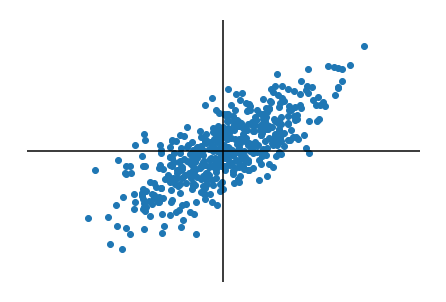

In [ ]:
# create new figure
fig = plt.figure(1)
# these two lines take care of figure axes: I think the picture is prittier without them
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
# now the data as scatter plot
plt.scatter(X[:,0], X[:,1])
# and x and y axes
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)
# show the plot
plt.show()

**Q1** What is the sample covariance matrix for the data? 
What are the eigenvectors and corresponding eigenvalues on a) real covariance where the data was created and b) sample covariance? Plot the eigenvectors above the data blob. 

[[1.0048123 0.7728977]
 [0.7728977 1.0448248]]
[1.75 0.25]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


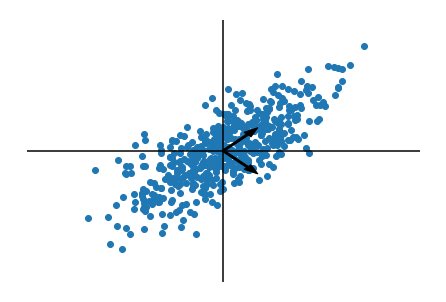

In [ ]:
# this is how you call numpy's eigenvalue solver:
# eigvals, eigvecs = np.linalg.eig(data_matrix_here)  
# this is one possibility for plotting a vector:
# plt.arrow(start_x, start_y, end_x, end_y, width=0.05, head_width=0.2, facecolor='k', length_includes_head=True)

sample_covariance= np.cov(X.T)
print(sample_covariance)

eigvals, eigvecs = np.linalg.eig(covmat)  
# eigvals_sample, eigvecs_sample = np.linalg.eig(sample_covariance)

print(eigvals)
print(eigvecs)

# print(eigvals_sample)
# print(eigvecs_sample)


# create new figure
fig = plt.figure(1)
# these two lines take care of figure axes: I think the picture is prittier without them
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
# now the data as scatter plot
plt.scatter(X[:,0], X[:,1])
# and x and y axes
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)
#plotting vectors
plt.arrow(0, 0, eigvecs[0,0], eigvecs[0,1], width=0.05, head_width=0.2, facecolor='k', length_includes_head=True)
plt.arrow(0, 0, eigvecs[1,0], eigvecs[1,1], width=0.05, head_width=0.2, facecolor='k', length_includes_head=True)
# show the plot
plt.show()

**Q2** What does the data look like when projected to the first principal component?  
Remember that the to project the data into $m$ most influential directions: 
1. Take $m$ most significant components into a matrix: $\mathbf{W} = \begin{bmatrix} \text{pc}_1 & \text{pc}_2 & \cdots & \text{pc}_m \end{bmatrix}$
2. Calculate transformed data: $\underbrace{\hat{\mathbf{X}}}_{n\times m} = \underbrace{\mathbf{X}}_{n\times d}\underbrace{\mathbf{W}}_{d\times m} $

[ 0.70710678 -0.70710678]
(500, 2)


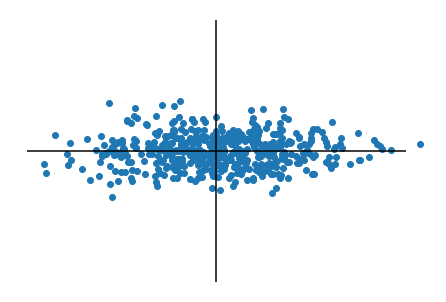

In [ ]:
# code here:
print(eigvecs[0])
X_new=X.dot(eigvecs)
print(X_new.shape)

# create new figure
fig = plt.figure(2)
# these two lines take care of figure axes: I think the picture is prittier without them
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
# now the data as scatter plot
plt.scatter(X_new[:,0], X_new[:,1])

# and x and y axes
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)
# show the plot
plt.show()

## PCA - algorithm

Now you should have an understanding on how PCA works. 

**Q3** Fill in the PCA function below

In [ ]:
import numpy as np

def my_pca(X, n_components): # assume data is given n*d 
    covmat=np.cov(X.T)
    print(covmat)
    eigenValues, eigenVectors= np.linalg.eig(covmat)
    
    # hint: numpy's eigenvalue solver gives eigenvalues in ascending order. If you would prefer descending,
    # you can sort your eigenvalues and eigenvectors with following:
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    #significant components
    signValues=eigenValues[:n_components]
    signVectors=eigenVectors[:n_components]

    #data transformed
    X_new=X.dot(signVectors)
    
    #var_explained
    var_explained = signValues / sum(signValues)

    
    # should return data transformed to n_components and the percentage of variance explained by each component
    return X_new, var_explained 


**Q4** Test your function with following well-known [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). What does the data look like when projected on two most significant principal components? How large portion of the variance in the data do they explain? How long does it take to run PCA with your code?

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
time elapsed: 0.004563000000000095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


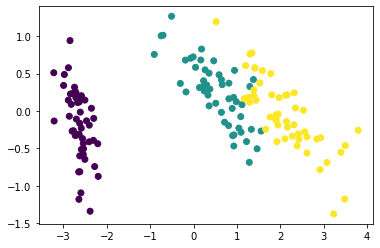

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.keys())  # data  is dictionary object
print(data['data'].shape)  # we are interested in field 'data', we have n=150 samples and dimensionality d=4
iris_data = data['data']

# Remember that the data should be centered!
col_mean = np.mean(iris_data, axis=0)  # means of the four columns 
# (ok could have named this as row_mean, too, because it is a mean over all rows, length 4)
# print(col_mean)  # not zero! need to subtract this from all rows
for ii in range(iris_data.shape[0]):
    iris_data[ii,:] -= col_mean
# print(np.mean(iris_data, axis=0))  # close enough

# implement the pca calculations here for measuring how long the execution of your takes, you can use the following:
"""

Fancy option for measuring time when using notebooks (in it's own code block!!):
%%timeit
# Do the stuff you are measuring here, the %%timeit repeats this multiple times and reports average


Or then the one you would use with traditional python:
import time
t = time.clock() # "start the clock" or rather, get the current time

# Do the stuff you are measuring here

print("time elapsed:",time.clock()-t)  # get the time difference from the start to this moment
"""
import time
t = time.clock()
iris_new, var_explained=my_pca(iris_data,4)
print("time elapsed:",time.clock()-t)

fig = plt.figure()
plt.scatter(iris_new[:,0], iris_new[:,1], c=data['target'])  # I assume you named your projected data "iris_new"
plt.show()


Python also implements PCA routine with [scikit learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). **Q5** Test it on the previous data set and comment the results. Is the result same? (Hint: should be!) How long did it take for this implementation to solve the problem?

time elapsed: 0.0018320000000002779
Explained variance: [0.92461872 0.05306648]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


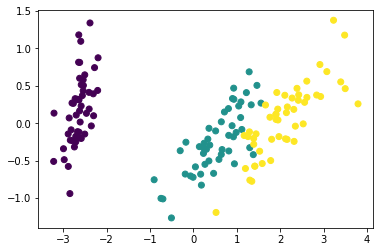

In [ ]:
from sklearn.decomposition import PCA

# the PCA in sklearn is an object, so we need to initialize it first:
pca_solver = PCA(2)  # we can specify number of desired components here in initialization 

# then we fit the solver to our data and transform it:
t = time.clock()
iris_new2 = pca_solver.fit_transform(iris_data)
print("time elapsed:",time.clock()-t)


# this variable contains a list of explained variances 
print("Explained variance:", pca_solver.explained_variance_ratio_)  

# if we need principal components we could access them from pca_solver.components_

# and then let's plot as before
fig = plt.figure()
plt.scatter(iris_new2[:,0], iris_new2[:,1], c=data['target'])  
plt.show()

**A5** (your comments)

We obtain structured data that can be regrouped in different clusters 

You should have seen that python's implementation is much faster than your own. Because for that and for avoiding any bugs in your own implementation we will be usingn the Python's version from now on. It is a good exercise when studying a new topic to implement your own code but in practice we should not reinvent the wheel. 

Often it is a good idea to preprocess the data before applying PCA with [sklearn's scale function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html). We have seen previously that PCA requires centered data, but often centering alone is not enough. One intuitive example is that if the dataset contains length measurements the results of PCA would change radically if the unit were to be meters instead of mm. This is often behaviour we do not want (but sometimes we might! All depends on your data..). One example how using or not using preprocessing affects your results can be found at this [sklearn's example](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

The preprocessing we use is called standardization, and the point is to (subtract the mean and) divide the data variables with their standard deviations. (Standard deviation is the square root of variance: although there is a connection we are not normalizing the variances of the data! That would be called whitening.) Intuitively we will be using correlation in PCA instead of covariance, see for example [this Wikipedia article](https://en.wikipedia.org/wiki/Covariance_and_correlation).

**Q6** Is the result of applying PCA the same on standardized iris data than non-standardized? What has changed? Which one do you think is better?

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]
Explained variance: [0.72962445 0.22850762]
(150, 2)


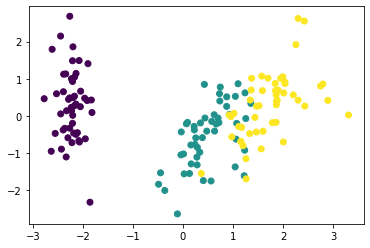

In [ ]:
from sklearn import preprocessing 

data = load_iris()
iris_data = data['data']
# Center to the mean and component wise scale to unit variance, along the four variables
iris_scaled = preprocessing.scale(iris_data,axis=0)

print(np.mean(iris_scaled, axis=0))  # column mean
print(np.std(iris_scaled, axis=0))  # column std

pca_solver = PCA(2) 
iris_new3 = pca_solver.fit_transform(iris_scaled)
print("Explained variance:", pca_solver.explained_variance_ratio_)  
print(iris_new3.shape)

# and then let's plot as before
fig = plt.figure()
plt.scatter(iris_new3[:,0], iris_new3[:,1], c=data['target'])  
plt.show()

**A6** The result of applying PCA is the same on standardized and non-standardized iris data. 

Preprocessing doesn't seem to have much impact in this case.

## Analyzing data with PCA 

### Dataset 1 - French state expences

The data is in file "depense_etat.txt", and contains the expences of French governement from 1872 to 1971 divided into following categories: 
* ACO : anciens combattants,
* ACS : Action Sociale
* AGR : agriculture,
* CMI : commerce et industrie,
* DEF : défense,
* DET : dette,
* DIV : divers.- PVP : pouvoirs publics,
* EDU : éducation et culture,
* LOG : logement et aménagement du territoire,
* TRA : transports

You can download and print the data as follows:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

data_source = '/content/'  # you'll probably need to change this based on where you saved the data!
filename = 'depense_etat.txt'
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")

print(df)

attribute_names = df.columns
object_names = df.index
dataset = df.values

print(attribute_names, len(attribute_names))
print(object_names, len(object_names), "\n")

print(dataset)

       PVP  AGR   CMI   TRA   LOG   EDU   ACS   ACO   DEF   DET  DIV
1872  18.0  0.5   0.1   6.7   0.5   2.1   2.0   0.0  26.4  41.5  2.1
1880  14.1  0.8   0.1  15.3   1.9   3.7   0.5   0.0  29.8  31.3  2.5
1890  13.6  0.7   0.7   6.8   0.6   7.1   0.7   0.0  33.8  34.4  1.7
1900  14.3  1.7   1.7   6.9   1.2   7.4   0.8   0.0  37.7  26.2  2.2
1903  10.3  1.5   0.4   9.3   0.6   8.5   0.9   0.0  38.4  27.2  3.0
1906  13.4  1.4   0.5   8.1   0.7   8.6   1.8   0.0  38.5  25.3  1.9
1909  13.5  1.1   0.5   9.0   0.6   9.0   3.4   0.0  36.8  23.5  2.6
1912  12.9  1.4   0.3   9.4   0.6   9.3   4.3   0.0  41.1  19.4  1.3
1920  12.3  0.3   0.1  11.9   2.4   3.7   1.7   1.9  42.4  23.1  0.2
1923   7.6  1.2   3.2   5.1   0.6   5.6   1.8  10.0  29.0  35.0  0.9
1926  10.5  0.3   0.4   4.5   1.8   6.6   2.1  10.1  19.9  41.6  2.3
1929  10.0  0.6   0.6   9.0   1.0   8.1   3.2  11.8  28.0  25.8  2.0
1932  10.6  0.8   0.3   8.9   3.0  10.0   6.4  13.4  27.4  19.2  0.0
1935   8.8  2.6   1.4   7.8   1.4 

**Q7** Can you infer anything about the data from correlations between variables and objects in this data set (code implemented for you below)? 

In [ ]:
def my_correlation_function(data, attr_names):
    # get correlation coefficients, function considers rows as attributes
    crl = np.corrcoef(data)  # transpose of data -> correlation among attributes
    print(crl)
    # sort the correlations and name them for easier interpretation
    sorted_crls = []
    for ii in range(data.shape[0]):
        for jj in range(ii + 1, data.shape[0]):
            sorted_crls.append((crl[ii, jj], attr_names[ii],attr_names[jj]))
    sorted_crls.sort(key=lambda x: abs(x[0]))
    sorted_crls.reverse()
    for cor in sorted_crls:
        print(cor)

# get correlations between attributes:
my_correlation_function(dataset.T, attribute_names)
print()
my_correlation_function(dataset, object_names)

[[ 1.         -0.08456147 -0.00182912  0.23274025  0.03561605 -0.15003967
  -0.13140258 -0.68690117  0.10105014  0.03355634  0.1493243 ]
 [-0.08456147  1.          0.60112018 -0.27583846  0.43573158  0.73132063
   0.80568293  0.04428292 -0.44836614 -0.6949172  -0.27720187]
 [-0.00182912  0.60112018  1.          0.09193172  0.8913519   0.46784573
   0.62198149  0.02273157 -0.53727388 -0.8041175  -0.34740689]
 [ 0.23274025 -0.27583846  0.09193172  1.          0.16610414 -0.21315407
  -0.20307154 -0.31322317  0.15797549 -0.14834035  0.11436882]
 [ 0.03561605  0.43573158  0.8913519   0.16610414  1.          0.23236075
   0.48776783  0.04471192 -0.37856133 -0.75803796 -0.43793515]
 [-0.15003967  0.73132063  0.46784573 -0.21315407  0.23236075  1.
   0.87497789  0.15696654 -0.52405752 -0.67024982 -0.24864596]
 [-0.13140258  0.80568293  0.62198149 -0.20307154  0.48776783  0.87497789
   1.          0.28819417 -0.56715016 -0.80819753 -0.52959488]
 [-0.68690117  0.04428292  0.02273157 -0.31322317

**A7** (your answer here)

There are variables whose correlation is very strong (ex: CMI'and 'LOG') while there are other variables which are not well correlated ('PVP', 'CMI')



**Q8** Apply PCA to standardized dataset in order to analyze which years have been similar (in the sense of budget). Determine how many components should you use for visualization?

In [ ]:
from sklearn import preprocessing

# todo your answer
data_scaled = preprocessing.scale(dataset,axis=0)
pca_solver = PCA(11) 
new_data = pca_solver.fit_transform(data_scaled)
print("Explained variance:", pca_solver.explained_variance_ratio_)  


Explained variance: [4.52124146e-01 1.86357793e-01 1.17265791e-01 9.03030181e-02
 6.43897368e-02 5.07876175e-02 1.85667949e-02 1.13905924e-02
 5.63020592e-03 3.18390850e-03 3.95840586e-07]


**Q9** Can you see anything interesting in correlations between new and old variables? Consider the code below that plots the components as bar plots. What can you see?

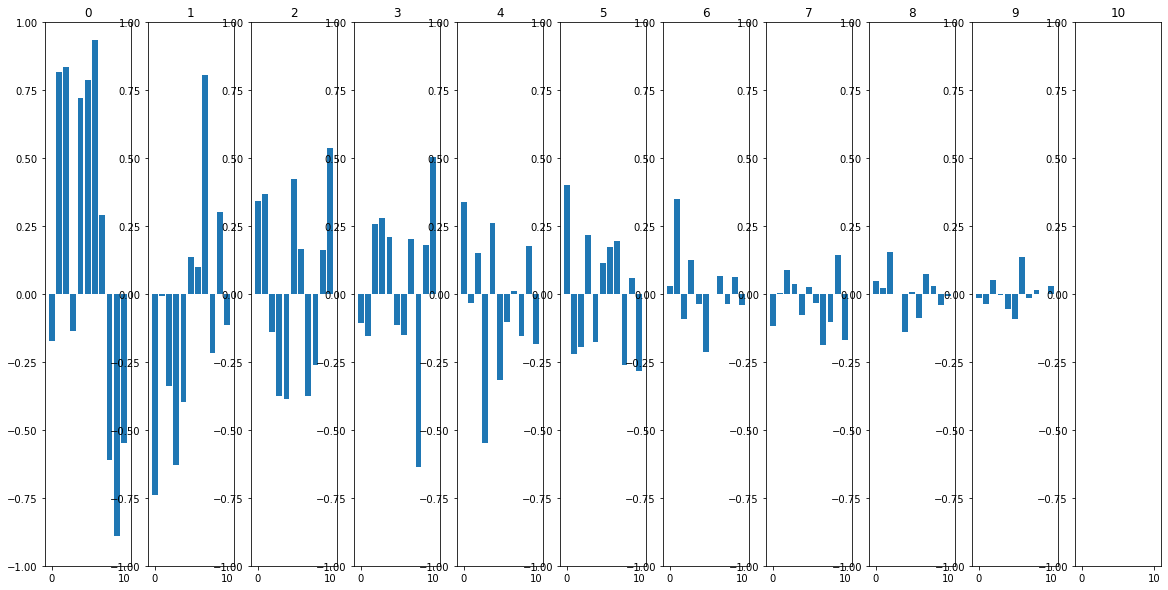

Index(['PVP', 'AGR', 'CMI', 'TRA', 'LOG', 'EDU', 'ACS', 'ACO', 'DEF', 'DET',
       'DIV'],
      dtype='object')


In [ ]:
n = len(pca_solver.explained_variance_ratio_)
correlations = np.array([[np.corrcoef(new_data[:, c].T, data_scaled[:, attr])[0, 1] 
                                            for c in range(n)]
                                          for attr in range(n)])

figure, axes = plt.subplots(1, len(correlations), figsize=(20,10))
for ii in range(n):
    axes[ii].set_title(str(ii))
    axes[ii].bar(range(n), correlations[:, ii])
    axes[ii].set_ylim(-1, 1)
plt.show()

print(attribute_names)

In the first five figures, we see that these components have high correlation coeff with the old variables
We can keep the first 5 variables because they have at least 1 correlation coefficient > 0.5 --> We keep a maximum of information

**A9** (your answer here)

**Q10** Next project the data to the most important principal components you found (if you found more than two you can do it in pairs of two components). What conclusions can you draw from the visualization?

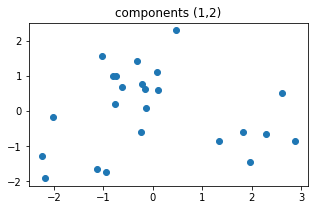

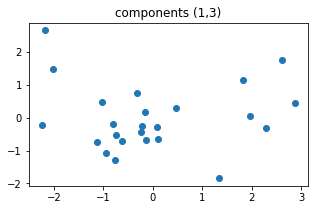

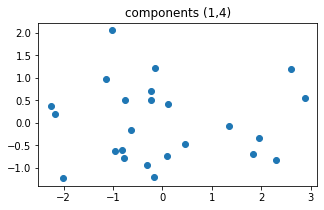

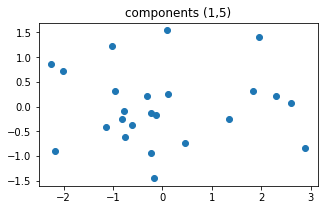

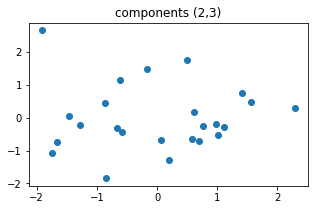

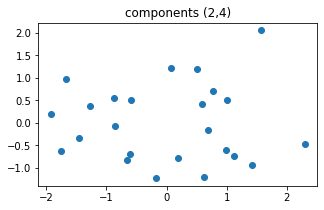

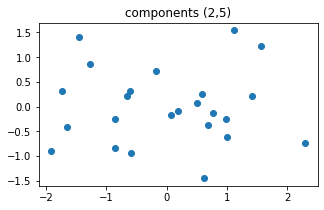

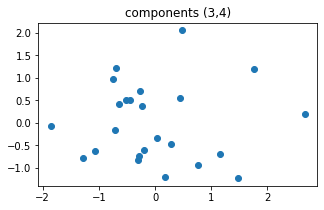

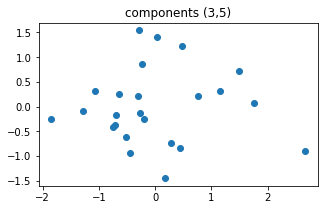

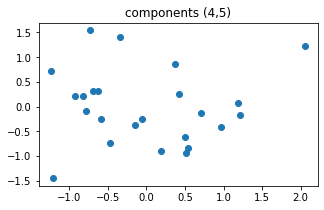

In [ ]:
# hint 1: if you want to put text beside your scatter plot elements, you can add elements one by one and 
# put text beside it with this plot command:
# plt.text(Xnew[ind,0]+0.2, Xnew[ind,1]+0.2, text_input, fontsize=9)
# or then just use plt.text as marker and forget the +0.2 offsets

# hint 2: for pretty scatter plots if you have floats (or ints) as the labels you can make the colour
# of data blob to correlate with label values: just add option "c=labels" with labels the array of your (numerical!) 
# labels after you have given data, like this: plt.scatter(transformed_data[:,0], transformed_data[:,1], c=labels)
# If you want to have text, you can call it with plt.text(x_coordinate, y_coordinate, text_content, fontsize=9)
n=1
for i in range(1,6):
  for j in range(i+1,6):
    fig = plt.figure(n,figsize=(5,3))
    title="components (" + str(i)+ ","+ str(j)+")"
    plt.title(title)
    plt.scatter(new_data[:,i], new_data[:,j])
    n+=1


**A10** (your answer also here in addition to the code)

By projecting our data to the principal components, we obtain structured data --> we didn't lose much information

#### Correlation circle

We can represent our data in a space given by principal components. Can we do the same for our variables? You guessed it, the answer is yes!

Consider two principal components, $pc1$ and $pc2$. A data point from the original space, $x$, is projected to the new space spanned by these components by multiplying it with matrix $[pc1 \; pc2]$ (or with each individual principal component and stacking the results into a vector). Now for variables the projections can be directly taken as rows of $[pc1 \; pc2]$.

When we plot these transformed variables we can deduce correlations among them. If two variables point to the same direction then they are correlated. If they point to opposite directions they are negatively correlated. For 90 degree angle we can say that the variables are not correlated. Note that the length of the line (how close it is to the unit circle line) indicates how well the variable is represented in this transformation to the two principal components chosen. So if the lines are very short, no conclusions should be drawn. 

In [ ]:
print(pca_solver.components_.shape)
print(pca_solver.components_[0])

(11, 11)
[-0.07783386  0.36703067  0.37379156 -0.06150644  0.3235781   0.35282174
  0.41848234  0.12957308 -0.27458025 -0.39852348 -0.24578306]


[-0.07783386  0.36703067  0.37379156 -0.06150644  0.3235781   0.35282174
  0.41848234  0.12957308 -0.27458025 -0.39852348 -0.24578306]
[-0.51668105 -0.00413325 -0.23762481 -0.44040821 -0.27778142  0.09533984
  0.07018239  0.56403536 -0.15096522  0.21055979 -0.0784799 ]


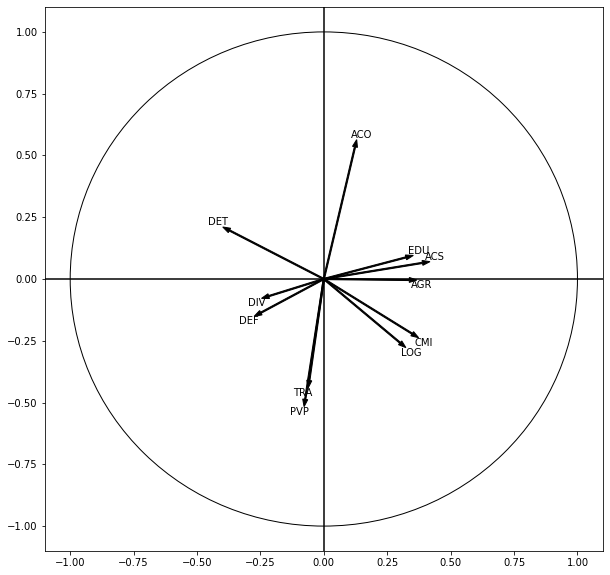

In [ ]:
def plot_pca_correlation_circle(pc1,pc2,names):
    
    plt.figure(figsize=(10,10))
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False)
    ax = plt.gca()
    ax.cla() # clear things for fresh plot
    ax.add_artist(circle1)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    for i, (x, y) in enumerate(zip(pc1, pc2)):
        plt.arrow(0, 0, x, y, width=0.005, head_width=0.02, facecolor='k', length_includes_head=True)
        plt.text(x+np.sign(x)*0.02, y+np.sign(y)*0.02, names[i], verticalalignment="center", horizontalalignment ="center")
        
    plt.axis((- 1.1,  1.1, - 1.1, + 1.1))
    plt.show()
    
print(pca_solver.components_[0,:])
print(pca_solver.components_[1,:])

plot_pca_correlation_circle(pca_solver.components_[0,:], pca_solver.components_[1,:], attribute_names)

**Q11** What sort of correlations are there in these variables when projected to the first two principal axes?

**A11** (your answer here)

We can group variables given the correlation between them:

* TRA and PVP are correlated (pointing to the same direction) . They are both negatively correlated to ACO

* LOG and CMI can be considered as correlated and both negatively correlated to DET. The same thing for EDU / ACS / AGR are correlated and both negatively correlated to DIV / DEF.


### Dataset 2 - of your choice

**Q12** Consider one of the provided datasets (nobels, tennis, patrimoi or fume). Perform the same type of analysis as for the previous state expenses dataset: identify the principal components and interpret them; project data to the principal component axis and visualize the similarities/dissimilarities between the objects. Comment your results.

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_source = '/content'  # you'll probably need to change this!
filename = 'tennis.txt'
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")
print(df, "\n")

             Coup_Droit  Revers  Service  ...  Psychisme  Physique  Jeu_en_double
ARIAS               8.0     5.0      3.0  ...        4.0       3.0            0.0
BECKER              8.0     7.0     10.0  ...        7.0       8.0            6.0
BORG               10.0     9.0      7.0  ...       10.0      10.0            2.0
CARLSSON            6.0     5.0      2.0  ...        4.0       5.0            0.0
CASH                5.0     4.0      6.0  ...        7.0       6.0            7.0
CLERC               7.0     6.0      4.0  ...        3.0       5.0            2.0
CONNORS             7.0    10.0      4.0  ...        9.0       6.0            0.0
CURREN              4.0     4.0      8.0  ...        2.0       5.0            7.0
EDBERG              5.0     8.0      8.0  ...        5.0       7.0            8.0
FORGET              7.0     4.0      6.0  ...        3.0       4.0            8.0
GERULAITIS          6.0     5.0      6.0  ...        4.0       5.0            5.0
GOMEZ           

In [ ]:
dataset = df.values
attributes = df.columns
samples = df.index

print(attributes)
print (dataset)

Index(['Coup_Droit', 'Revers', 'Service', 'Vole', 'Retour', 'Smash',
       'Jeu_de_jambe', 'Lob', 'Amorti', 'Passing', 'Regularite', 'Touche',
       'Psychisme', 'Physique', 'Jeu_en_double'],
      dtype='object')
[[ 8.  5.  3.  2.  6.  3.  6.  5.  2.  6.  6.  3.  4.  3.  0.]
 [ 8.  7. 10.  8.  7.  9.  6.  5.  3.  6.  5.  5.  7.  8.  6.]
 [10.  9.  7.  5.  9.  9. 10.  7.  4. 10. 10.  5. 10. 10.  2.]
 [ 6.  5.  2.  2.  6.  2.  6.  4.  2.  6.  6.  2.  4.  5.  0.]
 [ 5.  4.  6.  7.  5.  7.  6.  3.  3.  4.  4.  3.  7.  6.  7.]
 [ 7.  6.  4.  3.  5.  3.  6.  6.  3.  6.  6.  4.  3.  5.  2.]
 [ 7. 10.  4.  6. 10.  7.  9.  9.  6.  9.  8.  6.  9.  6.  0.]
 [ 4.  4.  8.  7.  6.  6.  5.  3.  4.  4.  4.  4.  2.  5.  7.]
 [ 5.  8.  8.  8.  6.  6.  6.  3.  4.  5.  5.  6.  5.  7.  8.]
 [ 7.  4.  6.  5.  5.  5.  5.  4.  4.  5.  4.  4.  3.  4.  8.]
 [ 6.  5.  6. 10.  4.  6.  8.  4. 10.  5.  5. 10.  4.  5.  5.]
 [ 8.  5.  4.  5.  4.  5.  5.  5.  4.  5.  4.  4.  3.  5.  7.]
 [ 6.  5.  6.  9.  6.  7.  6

Explained variance: [0.41771497 0.30147302 0.09329229 0.03606352 0.03193348 0.0287273
 0.02522077 0.02005957 0.01581394 0.009164   0.00609818 0.00525109
 0.00376963 0.00334452 0.00207373]


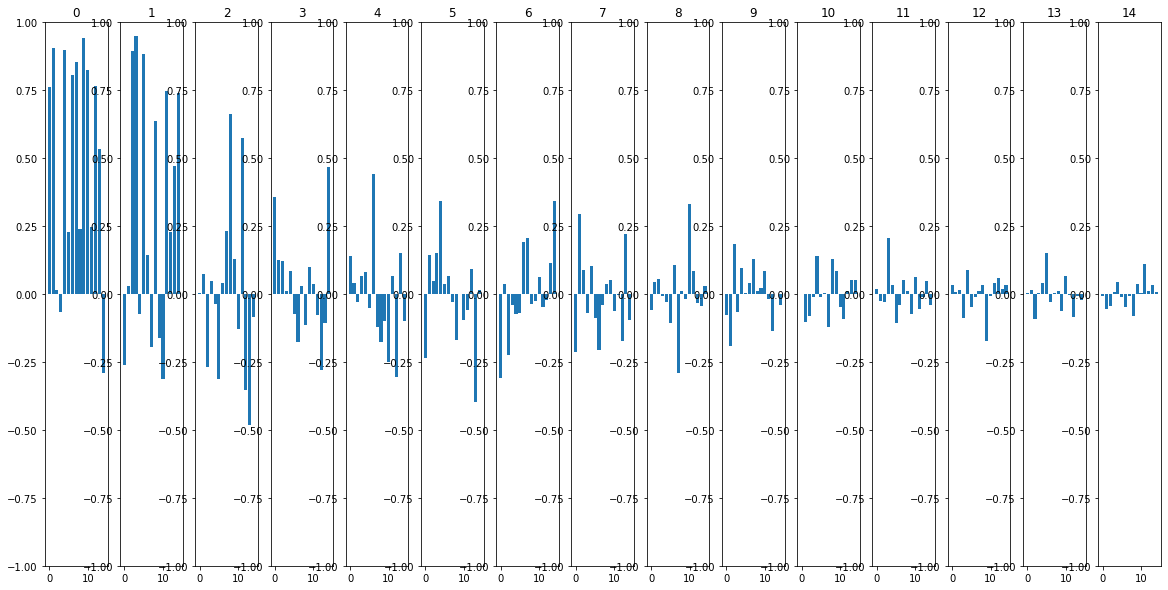

Index(['PVP', 'AGR', 'CMI', 'TRA', 'LOG', 'EDU', 'ACS', 'ACO', 'DEF', 'DET',
       'DIV'],
      dtype='object')


In [ ]:
data_scaled = preprocessing.scale(dataset,axis=0)
pca_solver = PCA(15) 
new_data = pca_solver.fit_transform(data_scaled)
print("Explained variance:", pca_solver.explained_variance_ratio_)  

n = len(pca_solver.explained_variance_ratio_)
correlations = np.array([[np.corrcoef(new_data[:, c].T, data_scaled[:, attr])[0, 1] 
                                            for c in range(n)]
                                          for attr in range(n)])

figure, axes = plt.subplots(1, len(correlations), figsize=(20,10))
for ii in range(n):
    axes[ii].set_title(str(ii))
    axes[ii].bar(range(n), correlations[:, ii])
    axes[ii].set_ylim(-1, 1)
plt.show()

print(attribute_names)


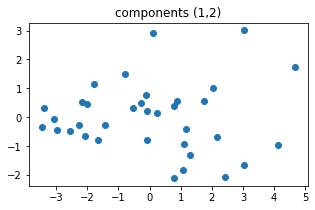

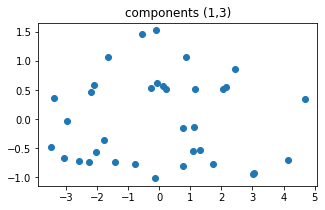

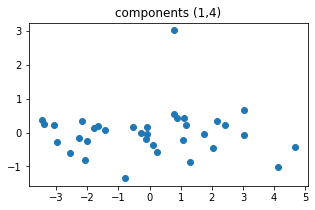

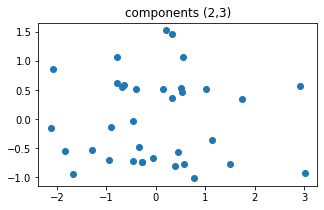

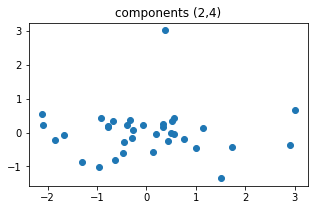

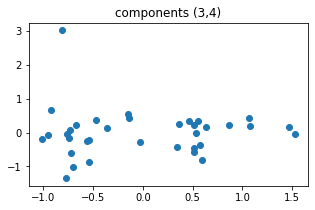

In [ ]:
#We consider the first 5 components
for i in range(1,5):
  for j in range(i+1,5):
    fig = plt.figure(n,figsize=(5,3))
    title="components (" + str(i)+ ","+ str(j)+")"
    plt.title(title)
    plt.scatter(new_data[:,i], new_data[:,j])
    n+=1

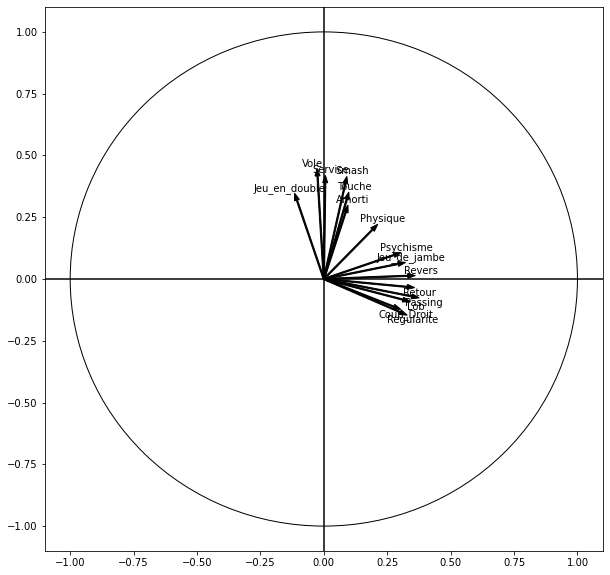

In [ ]:
plot_pca_correlation_circle(pca_solver.components_[0,:], pca_solver.components_[1,:], attributes)

### Dataset 3 - faces

We will consider a face dataset. You can access it as follows. (Note: this downloads it from internet! Another option if you are working on ECMs computers is to check the folder indicated below and use the data home folder as indicated below, in comments.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_lfw_people


lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Some information about the images:

In [ ]:
images = lfw_people.data # list of images
num_images, height_image, width_image = lfw_people.images.shape
people_names = lfw_people.target_names
people_by_image = [people_names[lfw_people.target[index]] for index in range(num_images)]

print("nombre images : ", num_images)
print("dimension images : ", height_image, width_image, height_image*width_image, "\n")

for nn in people_names:
    print(nn)
    
print()

for index in range(num_images):
    print("image", index, "name :", people_by_image[index])

nombre images :  1288
dimension images :  50 37 1850 

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair

image 0 name : Hugo Chavez
image 1 name : Tony Blair
image 2 name : George W Bush
image 3 name : Colin Powell
image 4 name : Ariel Sharon
image 5 name : Colin Powell
image 6 name : George W Bush
image 7 name : Gerhard Schroeder
image 8 name : George W Bush
image 9 name : Ariel Sharon
image 10 name : George W Bush
image 11 name : Donald Rumsfeld
image 12 name : George W Bush
image 13 name : Colin Powell
image 14 name : Gerhard Schroeder
image 15 name : George W Bush
image 16 name : George W Bush
image 17 name : George W Bush
image 18 name : George W Bush
image 19 name : George W Bush
image 20 name : George W Bush
image 21 name : George W Bush
image 22 name : Hugo Chavez
image 23 name : George W Bush
image 24 name : Tony Blair
image 25 name : Hugo Chavez
image 26 name : Tony Blair
image 27 name : Hugo Chavez
image 28 name : Donald Rumsfe

Each image is a grayscale vector of size height$\times$width. You can take a look at the faces like this:

[ 99.        97.       101.666664 ...  45.666668  49.666668  42.333332]


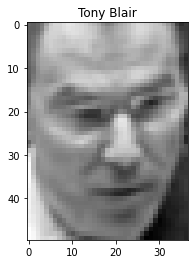

In [ ]:
print(images[42])

plt.figure()
plt.title(people_by_image[42])
plt.imshow(images[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()

#### PCA on images

Let us perform PCA on the images. We will consider 50 new dimensions. 

Normalize the greyscale for all the images with the method you think is the best (below some options). Note that now it might make more sense (as we are talking about image data) to normalize each object, or image, to be in certain range. 

(1288, 1850)
0.0
1.0


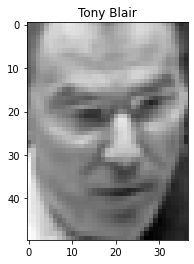

[0.3953846  0.38615385 0.4076923  ... 0.14923078 0.16769232 0.13384615]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


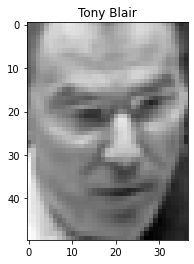

[-0.74623543 -0.7949906  -0.6812286  ... -2.0463736  -1.9488633
 -2.1276326 ]


In [ ]:
from sklearn import preprocessing 

print(images.shape)

# option one: "scales and translates each feature individually such that 
# it is in the given range on the training set, i.e. between zero and one.""

images_scaled = preprocessing.MinMaxScaler().fit_transform(images.T).T
print(min(images_scaled[42]))
print(max(images_scaled[42]))

plt.title(people_by_image[42])
plt.imshow(images_scaled[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()
print(images_scaled[42])

# option two that we already saw, mean to zero and std of variables is 1

images_scaled = preprocessing.scale(images, axis=1)
print(np.std(images_scaled[42]))
plt.title(people_by_image[42])
plt.imshow(images_scaled[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()
print(images_scaled[42])

Next the PCA. Let us first look at the variance explained by the first 50 components. **Q13** What do you think, will the the projections be good with this amount of components?

In [ ]:
from sklearn.decomposition import PCA

pca_img = PCA(50)  #50 first components

transformed_images = pca_img.fit_transform(images_scaled) 

cumul_expl = 0
for ii in range(50):
    cumul_expl += pca_img.explained_variance_ratio_[ii]
    print("%2d   %5.2f   %5.2f" %(ii, pca_img.explained_variance_ratio_[ii]*100, cumul_expl*100))

 0   16.68   16.68
 1    9.28   25.96
 2    7.11   33.07
 3    5.15   38.22
 4    4.03   42.25
 5    3.24   45.49
 6    2.77   48.25
 7    2.60   50.85
 8    2.35   53.20
 9    2.04   55.24
10    1.80   57.04
11    1.65   58.69
12    1.41   60.10
13    1.34   61.44
14    1.19   62.64
15    1.11   63.75
16    1.05   64.80
17    1.00   65.81
18    0.94   66.74
19    0.90   67.64
20    0.86   68.51
21    0.79   69.30
22    0.77   70.07
23    0.70   70.77
24    0.67   71.44
25    0.64   72.08
26    0.64   72.72
27    0.58   73.30
28    0.54   73.85
29    0.52   74.37
30    0.51   74.88
31    0.48   75.35
32    0.45   75.80
33    0.43   76.23
34    0.41   76.64
35    0.40   77.04
36    0.40   77.43
37    0.37   77.80
38    0.37   78.17
39    0.36   78.54
40    0.35   78.88
41    0.34   79.22
42    0.34   79.56
43    0.33   79.89
44    0.30   80.20
45    0.30   80.49
46    0.29   80.78
47    0.28   81.06
48    0.28   81.34
49    0.27   81.62


**A13** (your answer here)

The cumulated explained variance is equal to 81.62% --> Using 50 components, we can restore ~82% of the information which is good

#### Importance of a principal component for observation - squared cosine

The squared cosine measure gives the importance a principal component has for a given observation. Remember that principal components are vectors whose length is the original dimensionality of the data, or the dimensionality of the observations. (So if I have $n$ observations with dimension $d$, the principal components I obtain will also be of dimension $d$, and I choose some amount of them and that will be the new data dimensionality.) We can measure the similarity of a pc and an observation with a squared cosine measure. 

Denote observation as $a$ and a pc as $b$. We see that $\cos^2(a,b) = (\frac{a\cdot b}{\|a\|\|b\|})^2 = \frac{(a\cdot b)^2}{\|a\|^2}$ in our case because any pc has length of one (by definition) and thus $\|b\|=1$. Now we see that for calculating squared cosine distance, we need firstly squared norm of our observation, and secondly squared inner product of our observation with a principal component. The first one is easy and simple to do. As for the second one, remember how we calculated our transformed data? That's right: they are just what we need, products between original objects and principal components. 

Below is the function for calculating the suqared cosine distances as described here. The output is a matrix whose size is number of objects (n) times number of principal components considered. 

Note that if we have normalized each object to have norm of 1 the squared cosine similarities are straight away only the inner procucts between data observation and a pc. This is why we normalized the data previously, to make the similarities more intuitive. As stated previously, data normalization before pca is wholly up to the user and what she/he thinks is best. 

In [ ]:

def my_cos_fun(initial_data, transformed_data):
    # assumes initial data n*d, transformed data n*d2 
    squared_norms = np.apply_along_axis(np.linalg.norm, 1, initial_data)**2
    # print(squared_norms.shape)  # n
    projection_quality_cos = np.array([[x*x / squared_norms[ii] for x in line] 
                                   for ii, line in enumerate(transformed_images)])
    # print(projection_quality_cos.shape)  # n*50, 50 is the number of principal components chosen before
    return projection_quality_cos

cos_q = my_cos_fun(images_scaled, transformed_images)

# print results:
from math import acos, pi
for index in range(num_images):
    cos2sum = sum(cos_q[index])
    print("%3d   qualite (cos^2) %6.4f  " %(index, cos2sum))
    
    # summing all the cosine similarities for this image to get an overall similarity measure to the pcs considered
    # the angle is the combined angle from sum of cosine values

  0   qualite (cos^2) 0.3761  
  1   qualite (cos^2) 0.3468  
  2   qualite (cos^2) 0.5132  
  3   qualite (cos^2) 0.5528  
  4   qualite (cos^2) 0.4536  
  5   qualite (cos^2) 0.7295  
  6   qualite (cos^2) 0.4666  
  7   qualite (cos^2) 0.3888  
  8   qualite (cos^2) 0.7387  
  9   qualite (cos^2) 0.6441  
 10   qualite (cos^2) 0.4438  
 11   qualite (cos^2) 0.8278  
 12   qualite (cos^2) 0.4590  
 13   qualite (cos^2) 0.4438  
 14   qualite (cos^2) 0.5079  
 15   qualite (cos^2) 1.1219  
 16   qualite (cos^2) 0.6510  
 17   qualite (cos^2) 0.5409  
 18   qualite (cos^2) 0.5510  
 19   qualite (cos^2) 0.4156  
 20   qualite (cos^2) 0.4172  
 21   qualite (cos^2) 0.3268  
 22   qualite (cos^2) 0.7442  
 23   qualite (cos^2) 0.5397  
 24   qualite (cos^2) 0.3293  
 25   qualite (cos^2) 0.8999  
 26   qualite (cos^2) 0.3651  
 27   qualite (cos^2) 0.3753  
 28   qualite (cos^2) 0.6432  
 29   qualite (cos^2) 0.6049  
 30   qualite (cos^2) 0.4551  
 31   qualite (cos^2) 0.3913  
 32   qu

####  New axes as prototype images (eigenfaces)

The PCA axes are directions that maximize variance. When applying to faces, we get very intuitive results. **Q14** Extract the first one and plot it. How can you explain this?

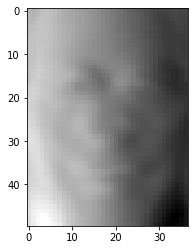

In [ ]:
# find the first pc
pc1 = pca_img.components_[0,:]

plt.imshow(pc1.reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()

**A14** (your answer here in addition to the code)

The first principal component containts only 16.68% of the information. When we apply it to faces, we have a blurry image as a result. We can't recognise which person is represented in the photo 

Plot the twelve first axis with code below. **Q15** Any comments on this?

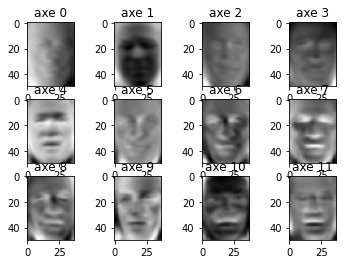

In [ ]:
figure, axes = plt.subplots(3, 4)
for ll in range(3):  # lines
    for cc in range(4):  # columns
        axes[ll][cc].set_title("axe " + str(ll * 4 + cc))
        axes[ll][cc].imshow(pca_img.components_[ll * 4 + cc, :].reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show()

**A15** (your answer here)

Each principle component enables to reproduce some characteristics of the face (based on the variance of contrast, luminosity... between points). Combined together, they are responsible for about 60% of the information but when we consider them separately, we have each and evey time a blurry image that makes it impossible to recognise the person 

#### Approximate images

Let us look at what the faces will look like when projected to the first 50 principal components. **Q16** Should this work? (How much of the cumulative variance in the faces these 50 axes represent?) 

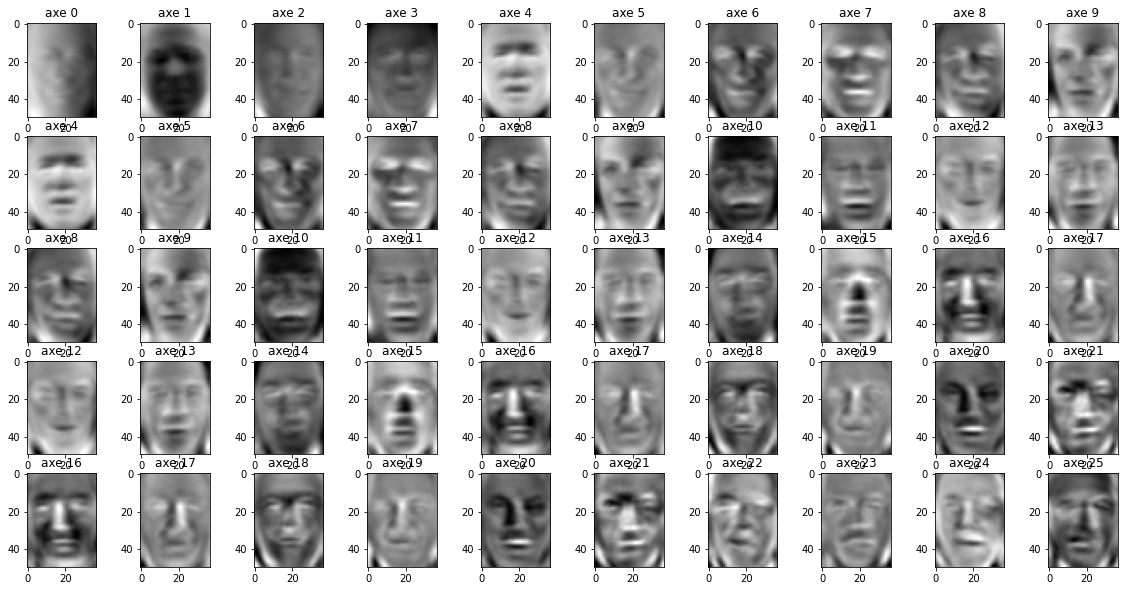

In [ ]:
figure, axes = plt.subplots(5, 10, figsize=(20,10))
for ll in range(5):  # lines
    for cc in range(10):  # columns
        axes[ll][cc].set_title("axe " + str(ll * 4 + cc))
        axes[ll][cc].imshow(pca_img.components_[ll * 4 + cc, :].reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show()

**A16** (your answer here)

These 50 axes represent almost 82% of the cumulative variance in the faces 

PCA transforms the data to some new axis. It is also possible to transform data back to the original space, using only the components given. **Q17** Take a look at [PCA's inverse_transform function](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform), and perform the transformation. 

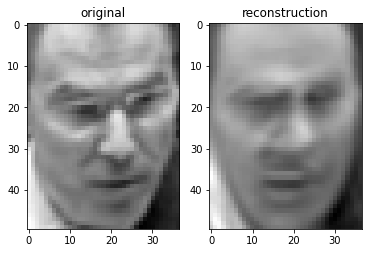

In [ ]:
# reconstruct an image number 42:
reconstructed_image = pca_img.inverse_transform(transformed_images[42])

# you can plot the reconstructed image like this: 
figure, axes = plt.subplots(1, 2)
axes[0].set_title("original")
axes[0].imshow(images_scaled[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
axes[1].set_title("reconstruction")
axes[1].imshow(reconstructed_image.reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show()


**Q18** Plot the images a few of the new faces and make the selections based on both big and small cosine similarity values. Can you see the difference in quality?

In [ ]:
print(cos_q.shape)
print(max(cos_q.sum(axis=1)))
print(cos_q.sum(axis=1).argsort())

(1288, 50)
1.5469807
[1257  366  998 ...  725  392  471]


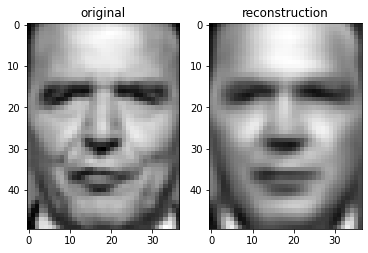

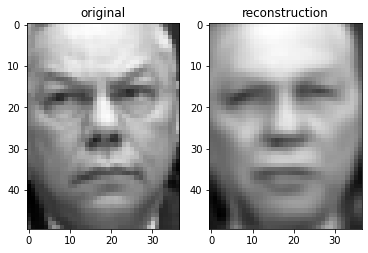

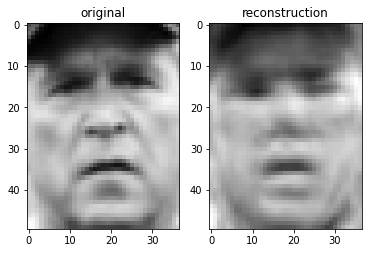

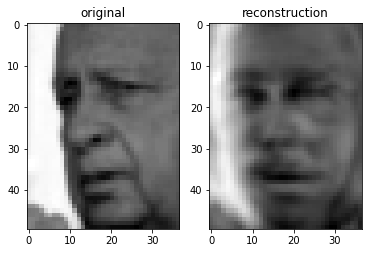

In [ ]:
i = cos_q.sum(axis=1).argsort() 

def reconstruction(image_ind):
  reconstructed_image = pca_img.inverse_transform(transformed_images[image_ind])  
  figure, axes = plt.subplots(1, 2)
  axes[0].set_title("original")
  axes[0].imshow(images_scaled[image_ind].reshape((height_image, width_image)), cmap=plt.cm.gray)
  axes[1].set_title("reconstruction")
  axes[1].imshow(reconstructed_image.reshape((height_image, width_image)), cmap=plt.cm.gray)
  plt.show()

# Plot the 2 best
for k in range (2):
  reconstruction(i[k])

# Plot the 2 worst
for k in range (2):
  reconstruction(i[-1-k])



**A18** (your answer also here)

The higher the cosine similarity is, the best we can recognise the reconstructed face image. It is the cas in the first two images.

#### Different levels of approximation

**Q19** Consider using 5, 10, 50, 100, and 200 components for a random image. What can you say about the reconstruction quality?

image chosen:  526 Donald Rumsfeld


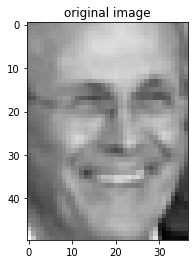

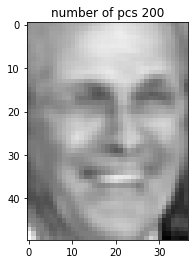

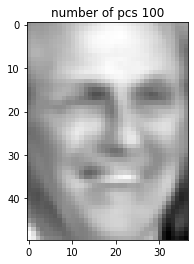

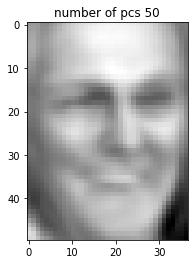

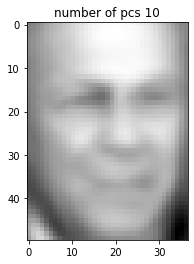

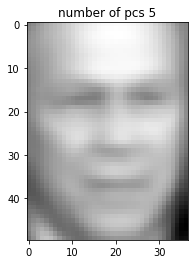

In [ ]:
rand_image = np.random.randint(num_images)
print("image chosen: ", rand_image, people_by_image[rand_image])

plt.imshow(images_scaled[rand_image].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.title("original image")
plt.show()

sizes = [200, 100, 50, 10, 5]

reconstructed_images = []

for n_pcs in sizes:
    
    # fill in: get the reconstructed image
    pca_img2=PCA(n_pcs)
    transformed_image = pca_img2.fit_transform(images_scaled) 
    reconstructed_image=pca_img2.inverse_transform(transformed_image[rand_image])

    plt.imshow(reconstructed_image.reshape((height_image, width_image)), cmap=plt.cm.gray)
    plt.title("number of pcs " + str(n_pcs))
    plt.show()
    

**A19** 

The more components we use, the more information we are able to restore. That's why when we use 200 components, the quality of the image is much better than it is when we use 100, 50 or 5 components.



#### Which axes are the most important?

Let us look at which axes were the most important for this particular image. Remember the squared cosine similarity? Use that to find the axes:

In [ ]:
# I'll run the one with 50 pcs again, so that we can see a bit more than 5 first components (that was run last)
pca_img2 = PCA(50)
transformed_images = pca_img2.fit_transform(images_scaled)

# use the my_cos_fun defined above:

projection_qualities = my_cos_fun(images_scaled, transformed_images)

print(projection_qualities[rand_image, :])
axes_order = np.argsort(-projection_qualities[rand_image, :])
print(axes_order)

[1.2626554e-04 4.6066172e-02 5.7155490e-02 1.1864050e-01 9.8448303e-03
 4.6224748e-03 3.3137687e-02 8.3036185e-04 1.8781004e-04 2.1403241e-03
 1.2627175e-03 6.8466121e-04 9.6005592e-03 1.1072626e-03 2.4189595e-02
 5.1311222e-03 6.6207031e-05 1.5671788e-04 3.7525813e-04 7.2872883e-04
 1.9236846e-02 7.0671053e-03 5.1051920e-06 1.3830048e-03 6.1911778e-05
 2.9732217e-03 2.6895173e-03 1.3110139e-03 1.9017665e-03 3.2786093e-06
 7.5308383e-03 3.8639708e-05 1.2184648e-03 2.6893481e-03 7.2014911e-05
 7.0340279e-04 2.9323888e-03 6.6584238e-04 3.9848568e-05 5.5725509e-03
 8.0726015e-05 4.1759835e-04 2.5276728e-03 5.2147527e-05 1.4498269e-03
 8.3775830e-04 1.5032829e-03 8.1877864e-05 4.6058255e-03 8.8463231e-08]
[ 3  2  1  6 14 20  4 12 30 21 39 15  5 48 25 36 26 33 42  9 28 46 44 23
 27 10 32 13 45  7 19 35 11 37 41 18  8 17  0 47 40 34 16 24 43 38 31 22
 29 49]


Let's plot the corresponding eigenfaces (principal components)

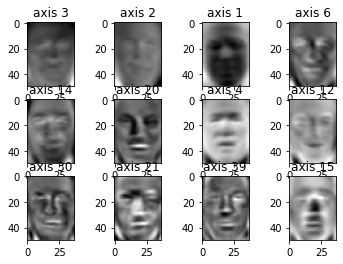

In [ ]:
figure, axes = plt.subplots(3, 4)
for ll in range(3):
    for cc in range(4):
        numero_axe = axes_order[ll * 4 + cc]
        axes[ll][cc].set_title("axis " + str(numero_axe))
        axes[ll][cc].imshow(pca_img2.components_[numero_axe, :].reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show() 

**Q20** Any comments?

**A20** We used the first 12 principal componenets (sorted by cosin similiraty)

We lost a lot of information but we still have information about the shape of the face and some facial features